In [4]:
import numpy as np


In [26]:
# network size N
N = 8
## start out with no infectious individuals
X = np.zeros(N)

## edge matrix 
E = np.array([[0,2],
              [1,2],
              [2,3],
              [2,4],
              [3,6],
              [5,3],
              [3,4],
              [4,7],
              [4,6]])

## number of edges
M = np.shape(E)[0]

## infection rate
b = 1.1

## initialize time
T = 0
## choose Tmax
Tmax = 5

## initial condition
X[2] = 1

## initialize number infected
I = np.sum(X)

timeSeries = [[T,I]]


In [27]:
while T < Tmax:

    T += np.random.exponential(1/(N + b*M))

    if np.random.random() < N/(N + b*M):

        i = np.random.randint(N)

        I -= X[i]

        X[i] = 0

    else:

        i,j = E[np.random.randint(M)]

        I += (int(X[i]) ^ int(X[j]))

        X[i] = X[j] = (X[i] or X[j])

    timeSeries.append([T,I])


Now we are interested in pre-determining the length of T and all the timestamps before we enter the loop, so that we can use an index into an appropriately-sized timeSeries array rather than appending (which is a more costly operation).

[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 7.0, 6.0, 5.0, 6.0, 6.0, 5.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0]


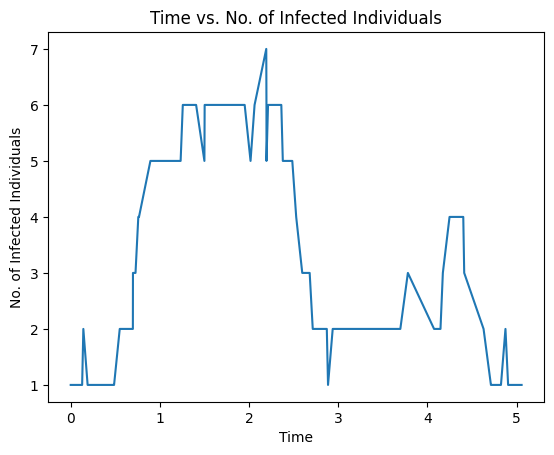

In [28]:
times = list(list(zip(*timeSeries))[0])
infected_no = list(list(zip(*timeSeries))[1])

print(infected_no)
import matplotlib.pyplot as plt

plt.plot(times, infected_no)
plt.title('Time vs. No. of Infected Individuals')
plt.ylabel('No. of Infected Individuals')
plt.xlabel('Time')
plt.show()
